In [1]:
import pandas as pd
import numpy as np
import os

os.listdir('../Healthcare_analytics/train/')

['.DS_Store',
 'Data_Dictionary.xlsx',
 'Third_Health_Camp_Attended.csv',
 'Health_Camp_Detail.csv',
 'Second_Health_Camp_Attended.csv',
 'First_Health_Camp_Attended.csv',
 'Train.csv',
 'Patient_Profile.csv']

In [2]:
train_path='../Healthcare_analytics/train/'

train = pd.read_csv(train_path+'Train.csv')
patient = pd.read_csv(train_path+'Patient_Profile.csv')
HC_detail = pd.read_csv(train_path+'Health_Camp_Detail.csv')
HCA1 = pd.read_csv(train_path+'First_Health_Camp_Attended.csv')
HCA2 = pd.read_csv(train_path+'Second_Health_Camp_Attended.csv')
HCA3 = pd.read_csv(train_path+'Third_Health_Camp_Attended.csv')

test = pd.read_csv('../Healthcare_analytics/test.csv')
sub = pd.read_csv('../Healthcare_analytics/sample_sub.csv')

In [3]:
train.shape,test.shape,sub.shape

((75278, 8), (35249, 8), (35249, 3))

In [4]:
patient.shape, HC_detail.shape, HCA1.shape, HCA2.shape, HCA3.shape

((37633, 11), (65, 6), (6218, 5), (7819, 3), (6515, 4))

In [5]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,489652,6578,10-Sep-05,4,0,0,0,2
1,507246,6578,18-Aug-05,45,5,0,0,7
2,523729,6534,29-Apr-06,0,0,0,0,0
3,524931,6535,07-Feb-04,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7


In [6]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [7]:
print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size))
print("Total Features with NaN Values in patient = " + str(patient.columns[patient.isnull().sum() != 0].size))
print("Total Features with NaN Values in health camp = " + str(HC_detail.columns[HC_detail.isnull().sum() != 0].size))
print("Total Features with NaN Values in HCA1 = " + str(HCA1.columns[HCA1.isnull().sum() != 0].size))
print("Total Features with NaN Values in HCA2 = " + str(HCA2.columns[HCA2.isnull().sum() != 0].size))
print("Total Features with NaN Values in HCA3 = " + str(HCA3.columns[HCA3.isnull().sum() != 0].size))
print("Total Features with NaN Values in Test = " + str(test.columns[test.isnull().sum() != 0].size))

Total Features with NaN Values in train = 1
Total Features with NaN Values in patient = 2
Total Features with NaN Values in health camp = 0
Total Features with NaN Values in HCA1 = 1
Total Features with NaN Values in HCA2 = 0
Total Features with NaN Values in HCA3 = 0
Total Features with NaN Values in Test = 0


In [8]:
## Merging train and test data set with Health camp details ##
train=pd.merge(train,HC_detail,on='Health_Camp_ID', how='left')
test=pd.merge(test,HC_detail,on='Health_Camp_ID', how='left')
train.shape,test.shape

((75278, 13), (35249, 13))

In [10]:
## Checking Nan Values in train dataset
train.isna().sum()

Patient_ID             0
Health_Camp_ID         0
Registration_Date    334
Var1                   0
Var2                   0
Var3                   0
Var4                   0
Var5                   0
Camp_Start_Date        0
Camp_End_Date          0
Category1              0
Category2              0
Category3              0
dtype: int64

In [11]:
## Filling registration date with camp start date for missing values
train.Registration_Date.fillna(train.Camp_Start_Date[train.Registration_Date.isna()==True], inplace=True)
print("Total Features with NaN Values in train = " + str(train.columns[train.isnull().sum() != 0].size))

Total Features with NaN Values in train = 0


In [12]:
## There are many 'None' values in patient details dataset, so relpacing this with NaN for missing value analysis
patient.replace(to_replace='None',value=pd.np.nan, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [13]:
## Percentage of missing data in patient details ##
patient.isna().mean() * 100

Patient_ID            0.000000
Online_Follower       0.000000
LinkedIn_Shared       0.000000
Twitter_Shared        0.000000
Facebook_Shared       0.000000
Income               88.409109
Education_Score      96.322377
Age                  86.673930
First_Interaction     0.000000
City_Type            62.136954
Employer_Category    92.453432
dtype: float64

In [14]:
## Since amount of NaN value is high, so dropping these features ##
patient.drop(['Income','Education_Score','Age','City_Type','Employer_Category'], axis=1, inplace=True)
print("Total Features with NaN Values in patient = " + str(patient.columns[patient.isnull().sum() != 0].size))

Total Features with NaN Values in patient = 0


In [15]:
# Percentage of missng values in HCA1
HCA1.isna().mean()*100

Patient_ID          0.0
Health_Camp_ID      0.0
Donation            0.0
Health_Score        0.0
Unnamed: 4        100.0
dtype: float64

In [16]:
HCA1.drop('Unnamed: 4', axis=1, inplace=True)
print("Total Features with NaN Values in HCA1 = " + str(HCA1.columns[HCA1.isnull().sum() != 0].size))

Total Features with NaN Values in HCA1 = 0


In [17]:
## Merging train and test data set with Patient details ##
train=pd.merge(train,patient,on='Patient_ID', how='left')
test=pd.merge(test,patient,on='Patient_ID', how='left')
train.shape,test.shape

((75278, 18), (35249, 18))

In [18]:
train=pd.merge(train,HCA1, how='left',on=['Patient_ID','Health_Camp_ID']).fillna(0)
#test=pd.merge(test,HCA1, how='left',on=['Patient_ID','Health_Camp_ID']).fillna(0)
train.shape,test.shape

((75278, 20), (35249, 18))

In [19]:
train=pd.merge(train,HCA2,how='left',on=['Patient_ID','Health_Camp_ID']).fillna(0)
#test=pd.merge(test,HCA2,how='left',on=['Patient_ID','Health_Camp_ID']).fillna(0)
train.shape,test.shape

((75278, 21), (35249, 18))

In [20]:
train=pd.merge(train,HCA3,how='left',on=['Patient_ID','Health_Camp_ID']).fillna(0)
#test=pd.merge(test,HCA3,how='left',on=['Patient_ID','Health_Camp_ID']).fillna(0)
train.shape,test.shape

((75278, 23), (35249, 18))

In [21]:
## Generating favourable outcome based on health score and number of stall visited for train dataset
train['Outcome']=[0 if train['Health_Score'][i]+train['Health Score'][i]+train['Number_of_stall_visited'][i]==0
                  else 1 for i in range(len(train))]

In [22]:
## Removing columns that can not be used for modelling
cols_to_remove=['Donation','Health_Score', 'Health Score', 'Number_of_stall_visited','Last_Stall_Visited_Number']
train.drop(cols_to_remove,axis=1,inplace=True)
train.shape,test.shape

((75278, 19), (35249, 18))

In [24]:
train['SocMedia_shared']=train['Online_Follower']+train['LinkedIn_Shared']+train['Twitter_Shared']+train['Facebook_Shared']

test['SocMedia_shared']=test['Online_Follower']+test['LinkedIn_Shared']+test['Twitter_Shared']+test['Facebook_Shared']

drop_col=['Online_Follower','LinkedIn_Shared','Twitter_Shared','Facebook_Shared']
train.drop(drop_col, axis=1, inplace=True)
test.drop(drop_col, axis=1, inplace=True)
train.shape,test.shape

((75278, 16), (35249, 15))

In [25]:
train.tail(10)

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,First_Interaction,Outcome,SocMedia_shared
75268,498348,6562,19-Jan-05,0,0,0,0,0,24-Nov-04,02-Jun-05,First,F,2,10-Jan-05,0,0
75269,513167,6526,04-Nov-04,0,0,0,0,0,03-Jan-05,20-Feb-05,First,E,2,24-Sep-04,0,0
75270,519968,6534,05-Jul-06,0,0,0,0,0,17-Oct-05,07-Nov-07,Second,A,2,24-Apr-05,1,0
75271,502806,6527,20-Jun-05,0,0,0,0,0,13-Jun-05,22-Jul-05,Third,G,2,07-Jan-05,0,0
75272,522723,6562,02-Apr-05,0,0,0,0,0,24-Nov-04,02-Jun-05,First,F,2,14-Mar-05,0,0
75273,500969,6539,03-Jan-05,0,0,0,0,0,07-Aug-04,12-Feb-05,First,F,2,14-Aug-04,0,0
75274,511952,6528,13-Feb-06,0,0,0,0,0,10-Feb-06,25-Apr-06,Third,G,2,12-Sep-04,1,3
75275,521236,6554,24-May-05,0,0,0,0,0,19-Jun-05,01-Jul-05,First,B,2,11-May-05,1,0
75276,518817,6580,22-Dec-04,0,0,0,0,0,22-Dec-04,06-Jan-05,First,E,2,24-Sep-04,0,0
75277,511284,6555,08-Aug-05,0,0,0,0,0,15-Sep-05,19-Sep-05,Second,A,2,31-Jul-05,0,0


In [26]:
train.drop(['Patient_ID','Health_Camp_ID'], axis=1, inplace=True)
test.drop(['Patient_ID','Health_Camp_ID'], axis=1, inplace=True)
train.shape, test.shape

((75278, 14), (35249, 13))

In [27]:
train.dtypes

Registration_Date    object
Var1                  int64
Var2                  int64
Var3                  int64
Var4                  int64
Var5                  int64
Camp_Start_Date      object
Camp_End_Date        object
Category1            object
Category2            object
Category3             int64
First_Interaction    object
Outcome               int64
SocMedia_shared       int64
dtype: object

In [28]:
%%time
from datetime import datetime
train['Registration_Date']=[datetime.strptime(train.Registration_Date[i],'%d-%b-%y') for i in range(len(train))]
train['Camp_Start_Date']=[datetime.strptime(train.Camp_Start_Date[i],'%d-%b-%y') for i in range(len(train))]
train['Camp_End_Date']=[datetime.strptime(train.Camp_End_Date[i],'%d-%b-%y') for i in range(len(train))]
train['First_Interaction']=[datetime.strptime(train.First_Interaction[i],'%d-%b-%y') for i in range(len(train))]

test['Registration_Date']=[datetime.strptime(test.Registration_Date[i],'%d-%b-%y') for i in range(len(test))]
test['Camp_Start_Date']=[datetime.strptime(test.Camp_Start_Date[i],'%d-%b-%y') for i in range(len(test))]
test['Camp_End_Date']=[datetime.strptime(test.Camp_End_Date[i],'%d-%b-%y') for i in range(len(test))]
test['First_Interaction']=[datetime.strptime(test.First_Interaction[i],'%d-%b-%y') for i in range(len(test))]

CPU times: user 19.6 s, sys: 59.7 ms, total: 19.7 s
Wall time: 19.8 s


In [29]:
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
color = sns.color_palette()

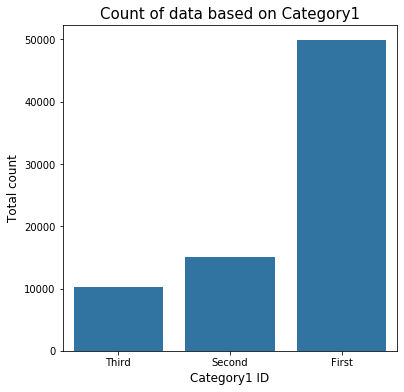

In [30]:
plt.figure(figsize=(6,6))
sns.countplot(train.Category1, color=color[0])
plt.ylabel('Total count', fontsize=12)
plt.xlabel('Category1 ID', fontsize=12)
plt.xticks(rotation='horizontal')
plt.title("Count of data based on Category1", fontsize=15)
plt.show()

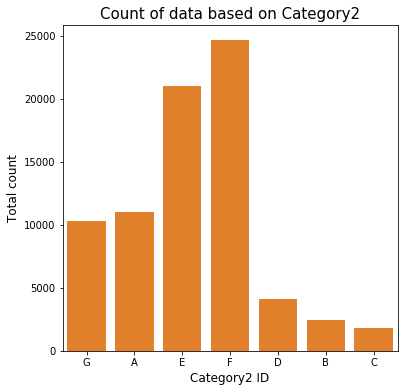

In [31]:
plt.figure(figsize=(6,6))
sns.countplot(train.Category2, color=color[1])
plt.ylabel('Total count', fontsize=12)
plt.xlabel('Category2 ID', fontsize=12)
plt.xticks(rotation='horizontal')
plt.title("Count of data based on Category2", fontsize=15)
plt.show()

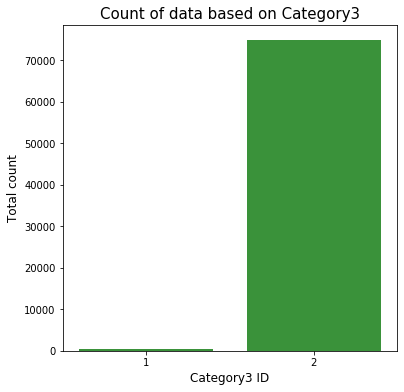

In [32]:
plt.figure(figsize=(6,6))
sns.countplot(train.Category3, color=color[2])
plt.ylabel('Total count', fontsize=12)
plt.xlabel('Category3 ID', fontsize=12)
plt.xticks(rotation='horizontal')
plt.title("Count of data based on Category3", fontsize=15)
plt.show()

In [33]:
## Dropping category3 feature as it is same for most of the records and in test set there is only one category.
## So this feature is not contributing anything for categorizing input data

train.drop('Category3',axis=1, inplace=True)
test.drop('Category3',axis=1, inplace=True)
train.shape, test.shape

((75278, 13), (35249, 12))

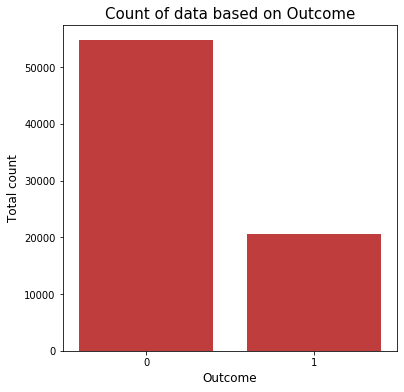

In [34]:
plt.figure(figsize=(6,6))
sns.countplot(train.Outcome, color=color[3])
plt.ylabel('Total count', fontsize=12)
plt.xlabel('Outcome', fontsize=12)
plt.xticks(rotation='horizontal')
plt.title("Count of data based on Outcome", fontsize=15)
plt.show()

In [35]:
## Some feature engineering based on date features ##

train['Camp_duration']=[(train.Camp_End_Date[i]-train.Camp_Start_Date[i]).days for i in range(len(train))]
test['Camp_duration']=[(test.Camp_End_Date[i]-test.Camp_Start_Date[i]).days for i in range(len(test))]

#train['reg_camp_end']=[(train.Camp_End_Date[i]-train.Registration_Date[i]).days for i in range(len(train))]
#test['reg_camp_end']=[(test.Camp_End_Date[i]-test.Registration_Date[i]).days for i in range(len(test))]

train['Reg_after_interact']=[(train.Registration_Date[i]-train.First_Interaction[i]).days for i in range(len(train))]
test['Reg_after_interact']=[(test.Registration_Date[i]-test.First_Interaction[i]).days for i in range(len(test))]

train['C_strt_after_interact']=[(train.Camp_Start_Date[i]-train.First_Interaction[i]).days for i in range(len(train))]
test['C_strt_after_interact']=[(test.Camp_Start_Date[i]-test.First_Interaction[i]).days for i in range(len(test))]

train['C_strt_after_reg']=[(train.Registration_Date[i]-train.Camp_Start_Date[i]).days for i in range(len(train))]
test['C_strt_after_reg']=[(test.Registration_Date[i]-test.Camp_Start_Date[i]).days for i in range(len(test))]

In [36]:
from autoviz.AutoViz_Class import AutoViz_Class
av= AutoViz_Class()

Imported AutoViz_Class version: 0.0.68. Call using: 
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
            
To remove previous versions, perform 'pip uninstall autoviz'


Shape of your Data Set: (75278, 17)
Classifying variables in data set...
    16 Predictors classified...
        This does not include the Target column(s)
    2 variables removed since they were ID or low-information variables
Total Number of Scatter Plots = 45


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Number of Cat and Continuous Vars exceeds 30, hence no Pivot or Bar Charts
Time to run AutoViz (in seconds) = 20.622


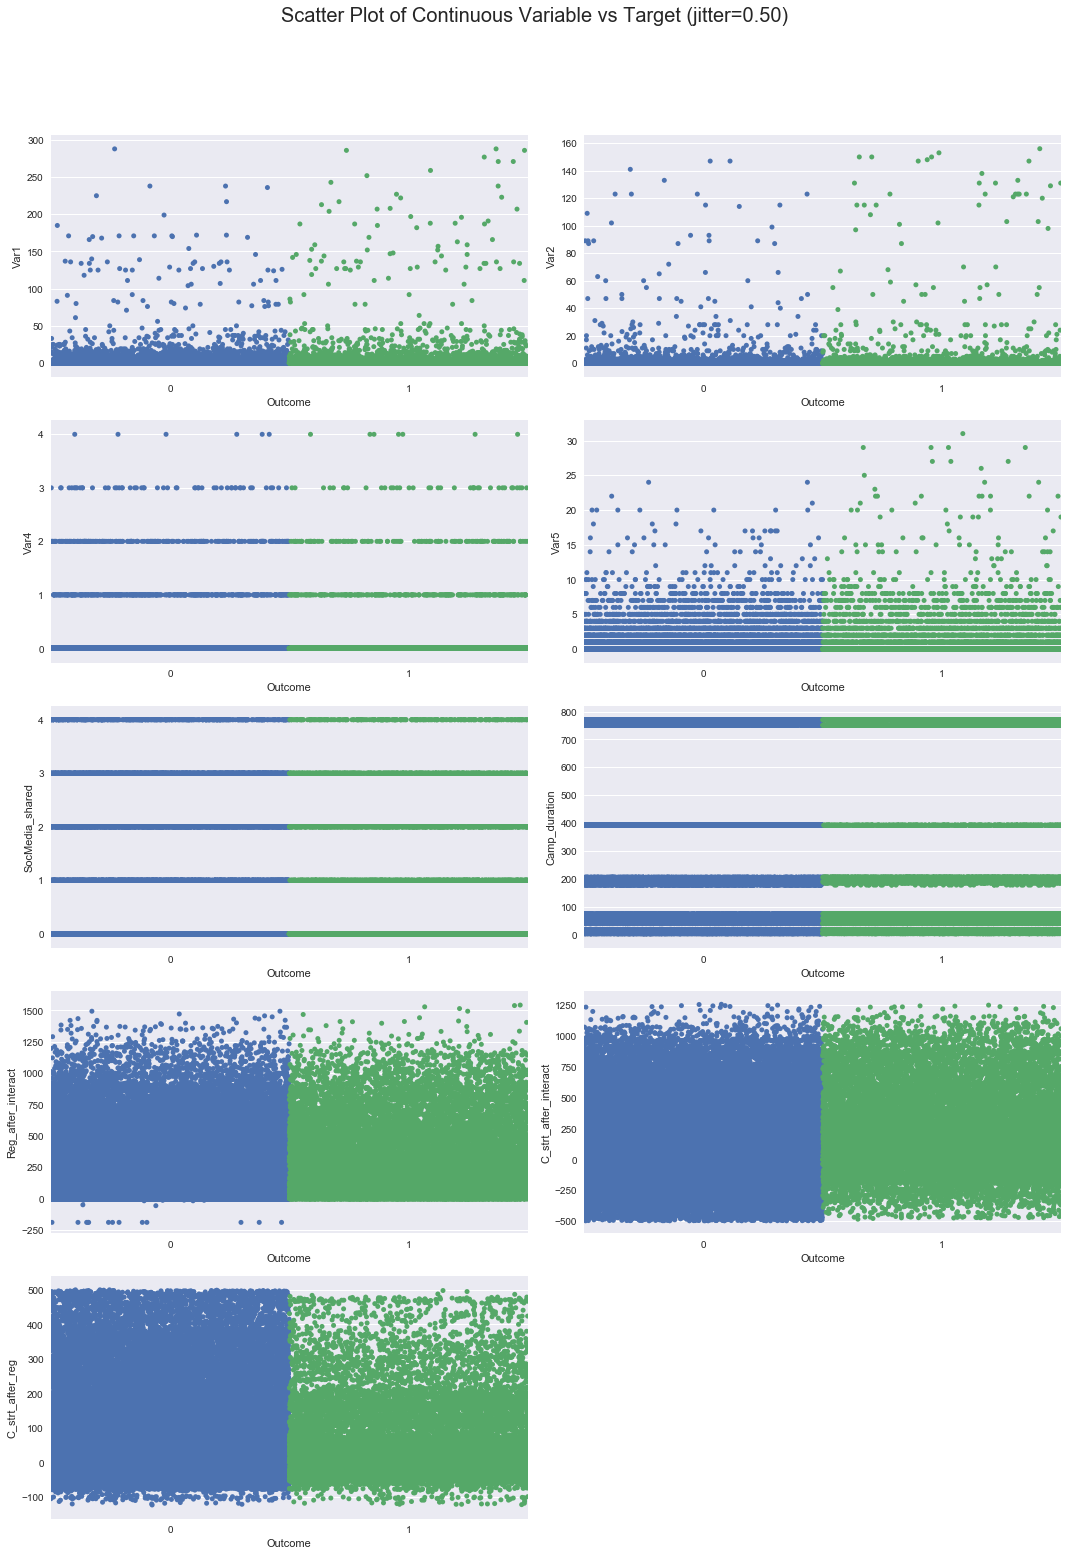

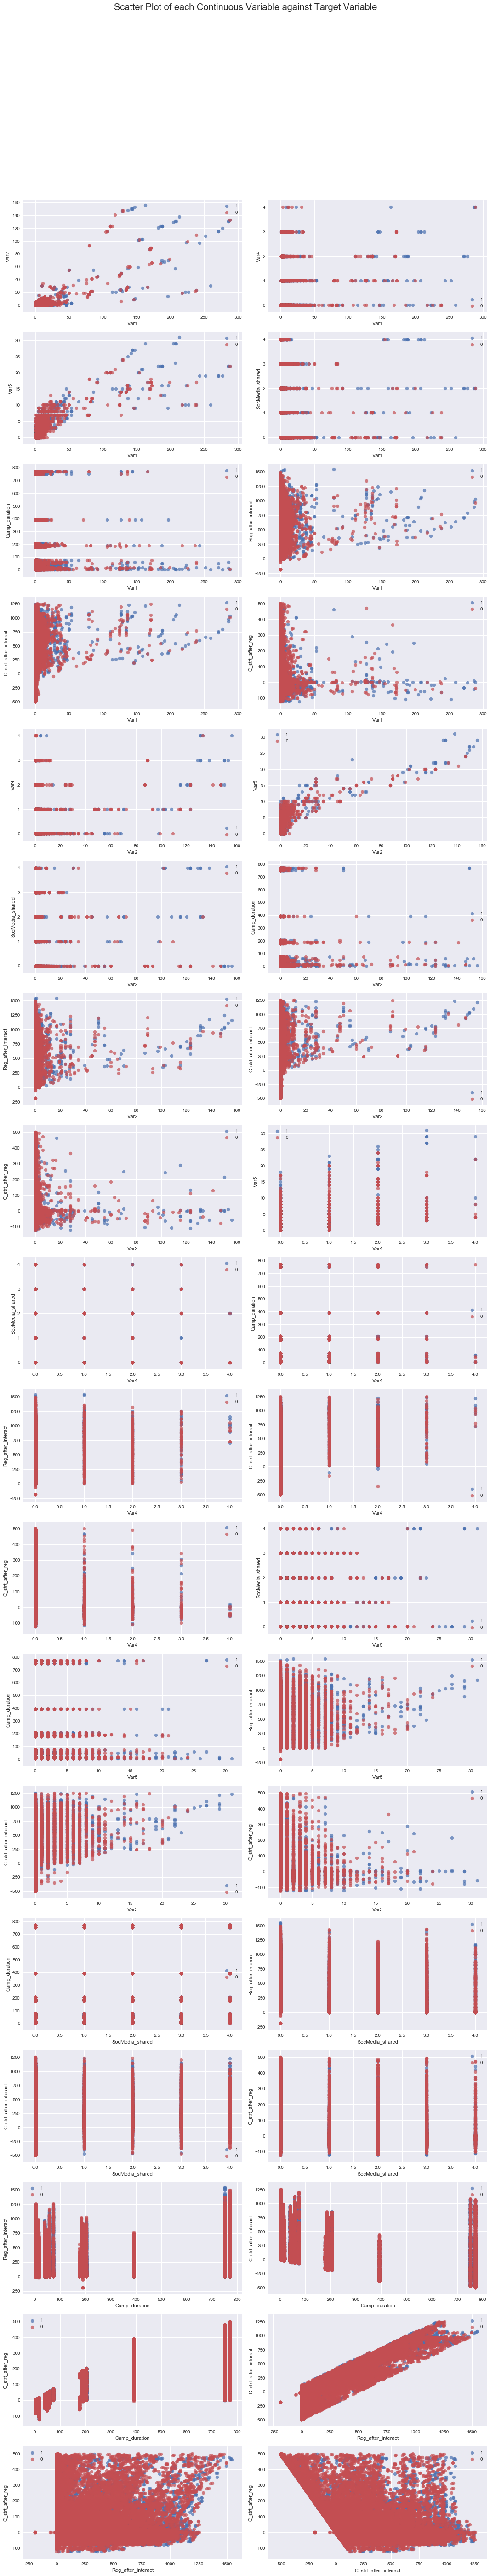

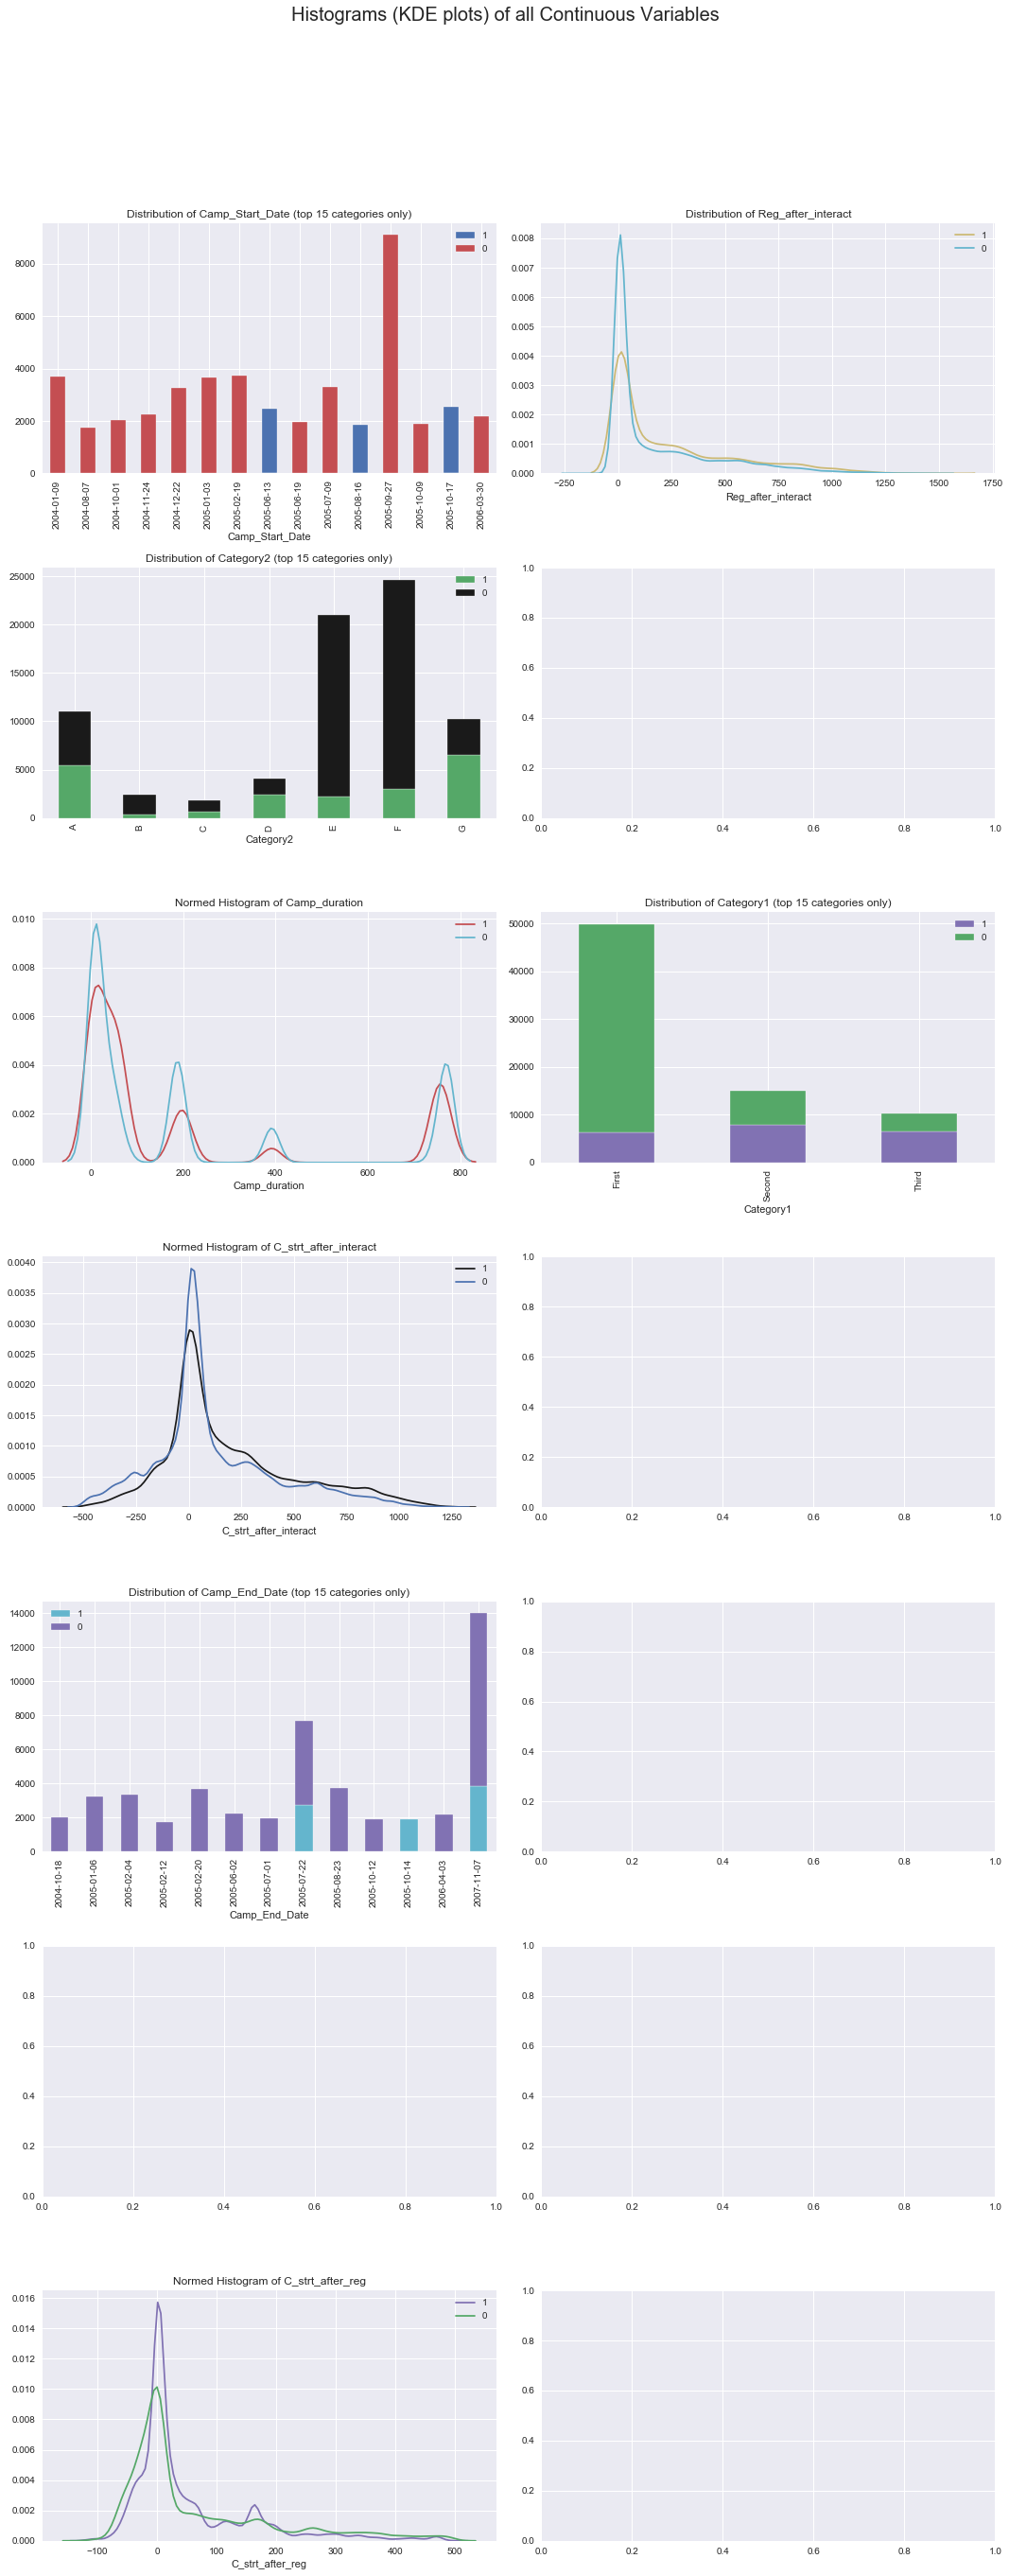

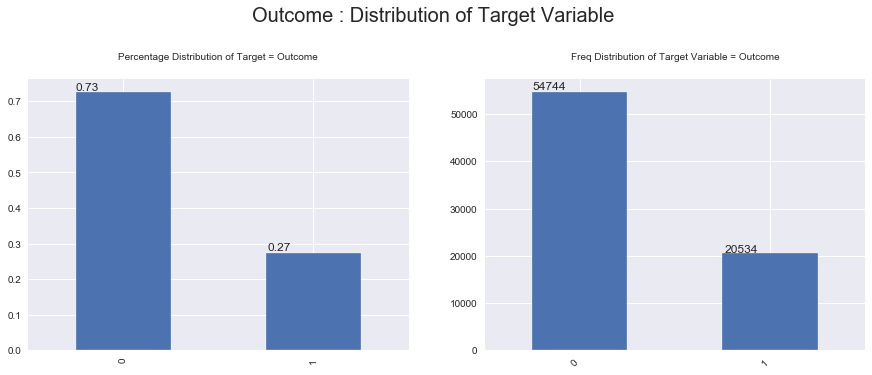

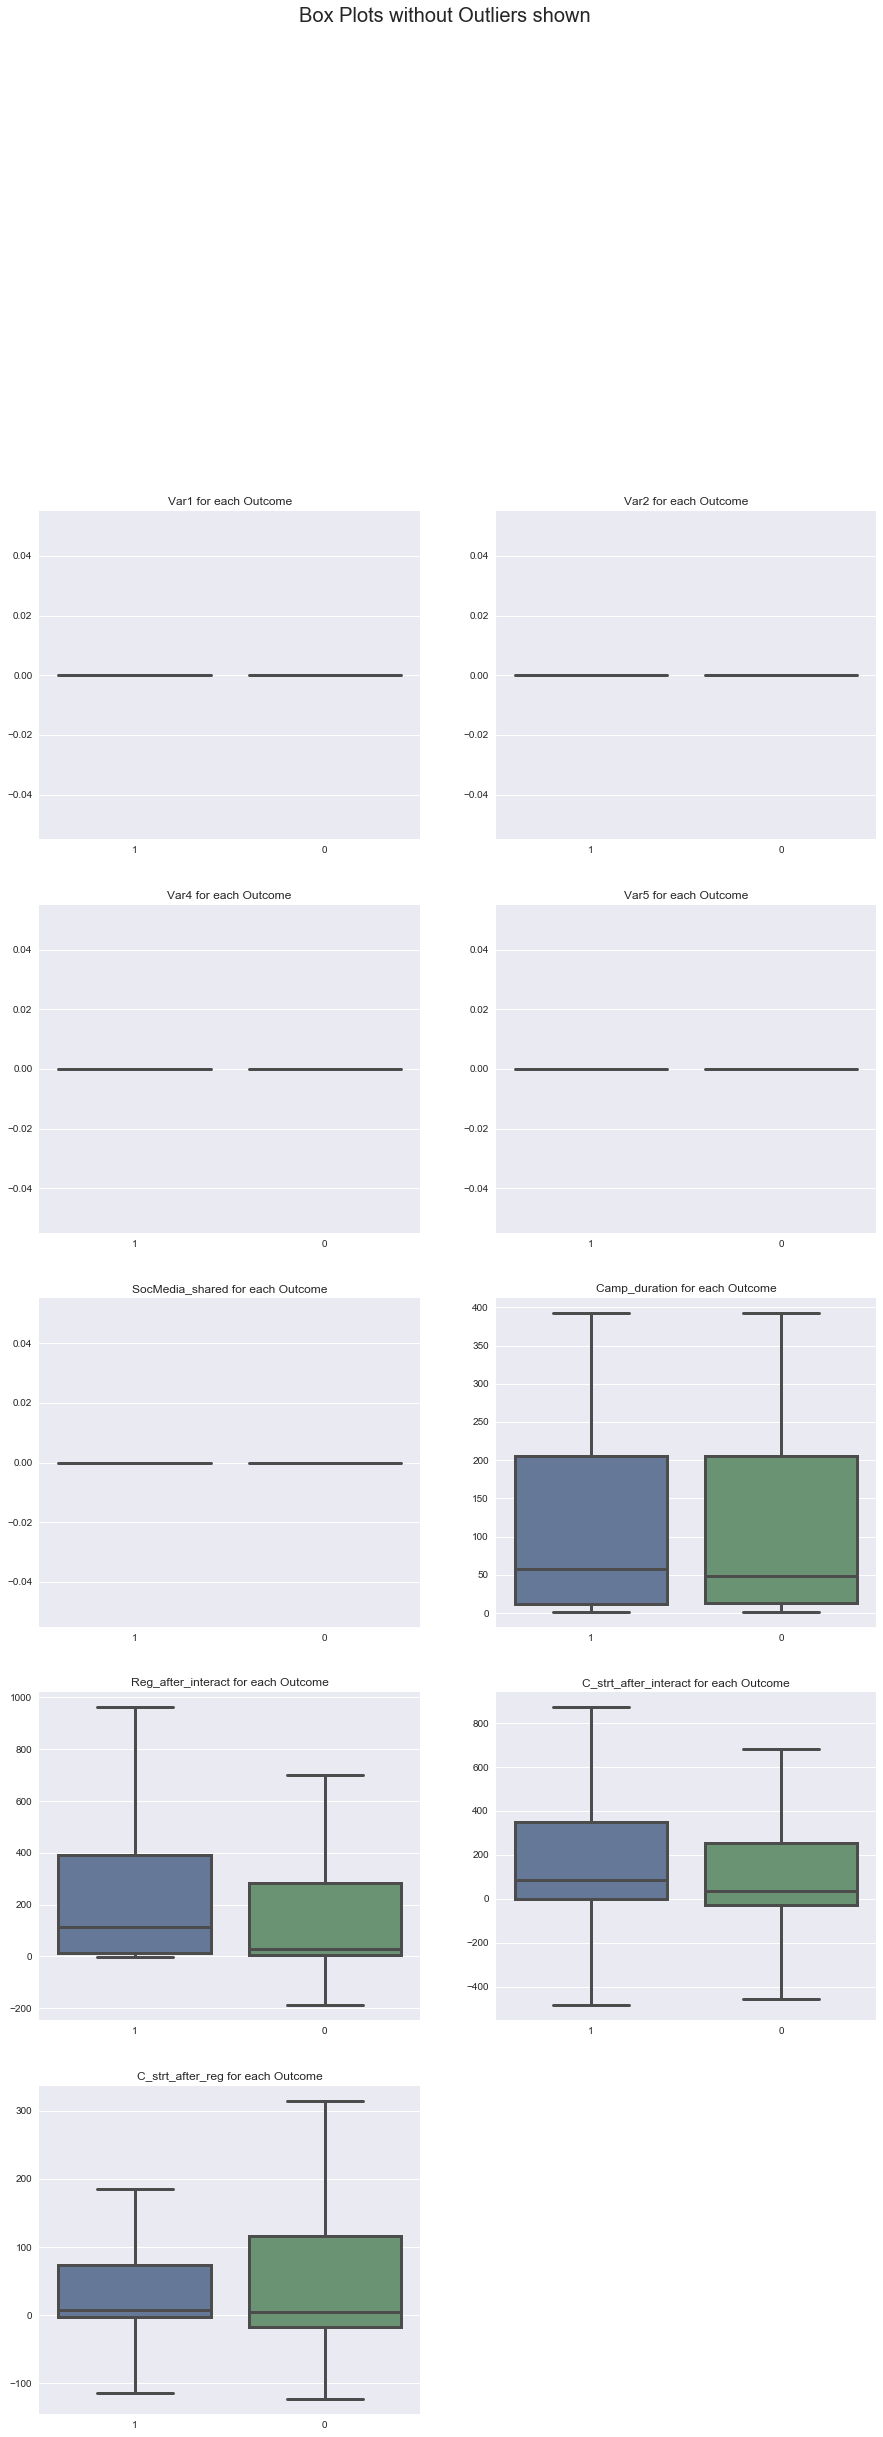

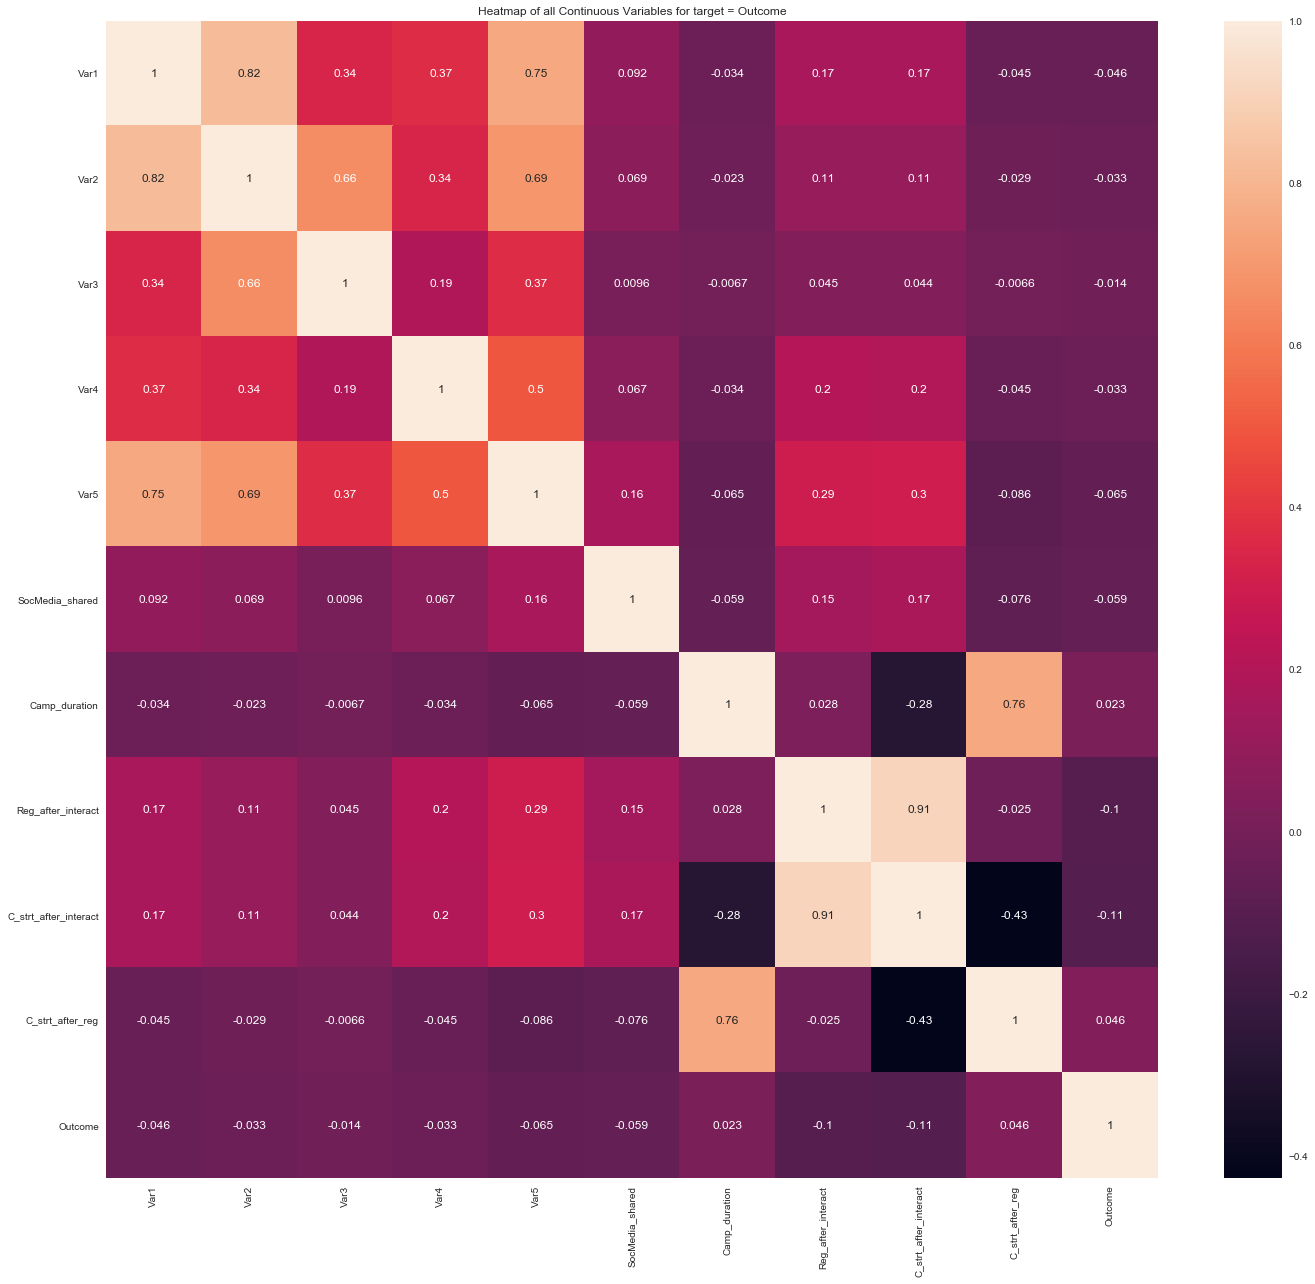

In [37]:
## Visualization of train data
train.to_csv('trn_data.csv', index=False)
df1= av.AutoViz('../Healthcare_analytics/trn_data.csv', depVar='Outcome')

In [38]:
import re
def gen_date_features(df, fldname, drop=True):
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    attr = ['Month', 'Week', 'Day']

    for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
    df[targ_pre+"week_of_month"]=(df[targ_pre+"Day"]-1)//7 +1
    
    if drop: df.drop(fldname, axis=1, inplace=True)

In [39]:
for df in (train, test):
    for col in ['Registration_Date','Camp_Start_Date','Camp_End_Date','First_Interaction']:
        gen_date_features(df, col, drop=True)
        
train.shape, test.shape        

((75278, 29), (35249, 28))

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#le_Category1=le.fit(train.Category1)
#train.Category1=le_Category1.fit_transform(train.Category1)
#test.Category1=le_Category1.fit_transform(test.Category1)
#
#le_Category2=le.fit(train.Category2)
#train.Category2=le_Category2.fit_transform(train.Category2)
#test.Category2=le_Category2.fit_transform(test.Category2)

In [40]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

train.shape, test.shape

((75278, 37), (35249, 35))

In [ ]:
#print('Checking high correlation between all feature in train dataset:')
#feature_names=[i for i in test.columns if test[i].dtypes != 'object']
#X = train[feature_names]
#corr_matrix = X.corr().abs()
#high_corr_var=np.where(corr_matrix>0.7)
#corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
#print('Variable with high correlation are :',corr_var)

In [ ]:
#corr_cols=['Var1',
#'Camp_duration',
#'C_strt_after_interact',
#'Registration_Week',
#'Registration_Day',
#'Camp_Start_Week',
#'Camp_Start_Day',
#'Camp_End_Week',
#'Camp_End_Day',
#'First_InteractionWeek',
#'First_InteractionDay']

#train.drop(cols_to_remove, axis=1, inplace=True)
#test.drop(cols_to_remove, axis=1, inplace=True)
#train.shape,test.shape

In [41]:
train.dtypes
cat_features=['Var3','Var4','SocMedia_shared']
              #'Online_Follower','Twitter_Shared','Facebook_Shared']
#for df in (train, test):
#    for col in cat_features:
#        df[col]=df[col].astype('category')

In [42]:
feature_names=[i for i in test.columns if i!= 'Outcome']
X_trn = train[feature_names]
y_trn = train['Outcome']
X_tst = test[feature_names]

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_trn, y_trn,stratify=y_trn, test_size=0.2,random_state=41)

X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_tst.shape

((60222, 35), (60222,), (15056, 35), (15056,), (35249, 35))

In [44]:
from sklearn import metrics

def AUC(actual,pred):
    return metrics.roc_auc_score(actual, pred)
    #fpr, tpr, thresholds = metrics.roc_curve(actual, pred)
    #return metrics.auc(fpr, tpr)

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,random_state=8,max_features = "auto",
                            min_samples_leaf=10,min_samples_split=8, oob_score = True,n_jobs = -1)
rf.fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_valid, y_valid)))

print("AUC on training set:",AUC(y_train, rf.predict(X_train)))
print("AUC on validation set:",AUC(y_valid, rf.predict(X_valid)))

Accuracy of Random Forest classifier on training set: 0.84
Accuracy of Random Forest classifier on test set: 0.82
AUC on training set: 0.7602260835045886
AUC on validation set: 0.7453016723639982


In [46]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
imp_feature=feature_importances[feature_importances['importance']>=0.01].T.columns
print(len(imp_feature))
feature_importances

26


,importance
Category1_First,0.175121
C_strt_after_reg,0.101196
Category2_G,0.072968
Category1_Third,0.059682
Category1_Second,0.056096
Reg_after_interact,0.049802
C_strt_after_interact,0.046173
Camp_Start_Day,0.033987
Registration_Week,0.033305
Registration_Day,0.031685


In [47]:
from sklearn.ensemble import RandomForestClassifier
rfi = RandomForestClassifier(n_estimators=200,random_state=8,max_features = "auto",class_weight={0:.27,1:.73},
                            min_samples_leaf=10,
                             min_samples_split=8, oob_score = True,n_jobs = -1)
rfi.fit(X_train[imp_feature], y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rfi.score(X_train[imp_feature], y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rfi.score(X_valid[imp_feature], y_valid)))

print("AUC on training set:",AUC(y_train, rfi.predict(X_train[imp_feature])))
print("AUC on validation set:",AUC(y_valid, rfi.predict(X_valid[imp_feature])))

Accuracy of Random Forest classifier on training set: 0.83
Accuracy of Random Forest classifier on test set: 0.79
AUC on training set: 0.8187736430322426
AUC on validation set: 0.7711272661706244


In [ ]:
pred=rfi.predict_proba(X_tst[imp_feature])[:,1]
sub['Outcome'] = pred
sub.to_csv('submission.csv', index=False)

In [48]:
import xgboost as xgb
param = {'silent':1, 'objective':'binary:logistic', 'booster':'gbtree','eta':0.001,'min_child_weight':2,
         'max_depth':15, 'eval_metric':'auc','gamma':0.01,'max_delta_step':0.01,'subsample':.7,
         'alpha': 0.01,'colsample_bytree':.5, 'lambda':.1}
xgtrain = xgb.DMatrix(X_train, label = y_train)
xgcv = xgb.DMatrix(X_valid, label = y_valid)
xgtest = xgb.DMatrix(X_tst)

watchlist = [(xgcv, 'eval'),(xgtrain, 'train')]
num_round = 500
bst = xgb.train(param, xgtrain, num_round, watchlist, early_stopping_rounds = 10)

[17:20:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	eval-auc:0.55918	train-auc:0.55892
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 10 rounds.
[1]	eval-auc:0.72989	train-auc:0.72550
[2]	eval-auc:0.73647	train-auc:0.73289
[3]	eval-auc:0.74482	train-auc:0.74140
[4]	eval-auc:0.76631	train-auc:0.76086
[5]	eval-auc:0.76700	train-auc:0.76169
[6]	eval-auc:0.76913	train-auc:0.76409
[7]	eval-auc:0.77020	train-auc:0.76480
[8]	eval-auc:0.77131	train-auc:0.76601
[9]	eval-auc:0.77182	train-auc:0.76649
[10]	eval-auc:0.77209	train-auc:0.76651
[11]	eval-auc:0.77259	train-auc:0.76681
[12]	eval-auc:0.77264	train-auc

In [49]:
pred=bst.predict(xgtest)
sub['Outcome'] = pred
sub.to_csv('submission.csv', index=False)

In [50]:
import lightgbm as lgb
#LightGBM classifier

model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary',
                       early_stopping = 50,num_iteration=10000,#num_leaves=80,
                       is_enable_sparse='true',tree_learner='data',min_data_in_leaf=40,max_depth=20,
                       learning_rate=0.01, n_estimators=1000, max_bin=255, subsample_for_bin=5000, 
                       min_split_gain=1, min_child_weight=1, min_child_samples=10, subsample=0.7, 
                       subsample_freq=1, colsample_bytree=.5, reg_alpha=0.01, 
                       reg_lambda=1, seed=41, nthread=-1, silent=True)

In [51]:
model.fit(
    X_train, 
    y_train, 
    eval_metric="AUC", 
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=True,
    early_stopping_rounds = 50)

[1]	training's auc: 0.817407	training's binary_logloss: 0.583056	valid_1's auc: 0.821427	valid_1's binary_logloss: 0.583011
Training until validation scores don't improve for 50 rounds
[2]	training's auc: 0.821649	training's binary_logloss: 0.580321	valid_1's auc: 0.826297	valid_1's binary_logloss: 0.580224
[3]	training's auc: 0.83225	training's binary_logloss: 0.577456	valid_1's auc: 0.834798	valid_1's binary_logloss: 0.577337
[4]	training's auc: 0.833509	training's binary_logloss: 0.574713	valid_1's auc: 0.836344	valid_1's binary_logloss: 0.574536
[5]	training's auc: 0.83368	training's binary_logloss: 0.572067	valid_1's auc: 0.836095	valid_1's binary_logloss: 0.571862
[6]	training's auc: 0.835982	training's binary_logloss: 0.56928	valid_1's auc: 0.839567	valid_1's binary_logloss: 0.568992
[7]	training's auc: 0.8357	training's binary_logloss: 0.566745	valid_1's auc: 0.839021	valid_1's binary_logloss: 0.56642
[8]	training's auc: 0.836227	training's binary_logloss: 0.564281	valid_1's au

[69]	training's auc: 0.844727	training's binary_logloss: 0.473097	valid_1's auc: 0.846824	valid_1's binary_logloss: 0.471249
[70]	training's auc: 0.844785	training's binary_logloss: 0.472247	valid_1's auc: 0.846908	valid_1's binary_logloss: 0.470386
[71]	training's auc: 0.844785	training's binary_logloss: 0.471449	valid_1's auc: 0.84691	valid_1's binary_logloss: 0.469562
[72]	training's auc: 0.84483	training's binary_logloss: 0.470624	valid_1's auc: 0.846956	valid_1's binary_logloss: 0.468709
[73]	training's auc: 0.844835	training's binary_logloss: 0.469836	valid_1's auc: 0.846957	valid_1's binary_logloss: 0.467913
[74]	training's auc: 0.84494	training's binary_logloss: 0.469034	valid_1's auc: 0.84706	valid_1's binary_logloss: 0.467082
[75]	training's auc: 0.844951	training's binary_logloss: 0.468315	valid_1's auc: 0.84705	valid_1's binary_logloss: 0.466354
[76]	training's auc: 0.845047	training's binary_logloss: 0.467498	valid_1's auc: 0.847084	valid_1's binary_logloss: 0.465543
[77]	

[140]	training's auc: 0.847658	training's binary_logloss: 0.436253	valid_1's auc: 0.849062	valid_1's binary_logloss: 0.434042
[141]	training's auc: 0.847659	training's binary_logloss: 0.435969	valid_1's auc: 0.849048	valid_1's binary_logloss: 0.433765
[142]	training's auc: 0.847692	training's binary_logloss: 0.435664	valid_1's auc: 0.849045	valid_1's binary_logloss: 0.433472
[143]	training's auc: 0.84774	training's binary_logloss: 0.435354	valid_1's auc: 0.849039	valid_1's binary_logloss: 0.433174
[144]	training's auc: 0.847766	training's binary_logloss: 0.435051	valid_1's auc: 0.849073	valid_1's binary_logloss: 0.432871
[145]	training's auc: 0.847783	training's binary_logloss: 0.434752	valid_1's auc: 0.849039	valid_1's binary_logloss: 0.432577
[146]	training's auc: 0.847809	training's binary_logloss: 0.434487	valid_1's auc: 0.849068	valid_1's binary_logloss: 0.432311
[147]	training's auc: 0.847838	training's binary_logloss: 0.43423	valid_1's auc: 0.849075	valid_1's binary_logloss: 0.4

[206]	training's auc: 0.850034	training's binary_logloss: 0.42267	valid_1's auc: 0.850503	valid_1's binary_logloss: 0.420945
[207]	training's auc: 0.85005	training's binary_logloss: 0.422549	valid_1's auc: 0.850492	valid_1's binary_logloss: 0.42084
[208]	training's auc: 0.850082	training's binary_logloss: 0.422428	valid_1's auc: 0.850506	valid_1's binary_logloss: 0.420745
[209]	training's auc: 0.850119	training's binary_logloss: 0.422298	valid_1's auc: 0.850538	valid_1's binary_logloss: 0.420613
[210]	training's auc: 0.850159	training's binary_logloss: 0.422161	valid_1's auc: 0.850578	valid_1's binary_logloss: 0.420472
[211]	training's auc: 0.85021	training's binary_logloss: 0.422018	valid_1's auc: 0.85062	valid_1's binary_logloss: 0.420336
[212]	training's auc: 0.850245	training's binary_logloss: 0.421908	valid_1's auc: 0.850644	valid_1's binary_logloss: 0.420227
[213]	training's auc: 0.850276	training's binary_logloss: 0.421764	valid_1's auc: 0.850658	valid_1's binary_logloss: 0.4200

[283]	training's auc: 0.852539	training's binary_logloss: 0.415091	valid_1's auc: 0.851773	valid_1's binary_logloss: 0.414387
[284]	training's auc: 0.85257	training's binary_logloss: 0.415008	valid_1's auc: 0.851803	valid_1's binary_logloss: 0.414309
[285]	training's auc: 0.852594	training's binary_logloss: 0.414933	valid_1's auc: 0.851815	valid_1's binary_logloss: 0.414254
[286]	training's auc: 0.852634	training's binary_logloss: 0.414857	valid_1's auc: 0.851839	valid_1's binary_logloss: 0.414194
[287]	training's auc: 0.852666	training's binary_logloss: 0.414781	valid_1's auc: 0.851853	valid_1's binary_logloss: 0.414131
[288]	training's auc: 0.852707	training's binary_logloss: 0.414713	valid_1's auc: 0.851861	valid_1's binary_logloss: 0.414092
[289]	training's auc: 0.852737	training's binary_logloss: 0.414636	valid_1's auc: 0.851911	valid_1's binary_logloss: 0.414012
[290]	training's auc: 0.852763	training's binary_logloss: 0.414584	valid_1's auc: 0.851931	valid_1's binary_logloss: 0.

[357]	training's auc: 0.854779	training's binary_logloss: 0.410847	valid_1's auc: 0.852745	valid_1's binary_logloss: 0.411461
[358]	training's auc: 0.854813	training's binary_logloss: 0.410794	valid_1's auc: 0.852762	valid_1's binary_logloss: 0.411422
[359]	training's auc: 0.854845	training's binary_logloss: 0.410744	valid_1's auc: 0.85278	valid_1's binary_logloss: 0.411394
[360]	training's auc: 0.854875	training's binary_logloss: 0.410698	valid_1's auc: 0.852805	valid_1's binary_logloss: 0.41136
[361]	training's auc: 0.854916	training's binary_logloss: 0.410635	valid_1's auc: 0.852826	valid_1's binary_logloss: 0.411308
[362]	training's auc: 0.854949	training's binary_logloss: 0.410584	valid_1's auc: 0.852834	valid_1's binary_logloss: 0.411291
[363]	training's auc: 0.854985	training's binary_logloss: 0.410531	valid_1's auc: 0.852844	valid_1's binary_logloss: 0.411269
[364]	training's auc: 0.855008	training's binary_logloss: 0.410482	valid_1's auc: 0.852854	valid_1's binary_logloss: 0.4

[423]	training's auc: 0.85664	training's binary_logloss: 0.407974	valid_1's auc: 0.853512	valid_1's binary_logloss: 0.409845
[424]	training's auc: 0.856672	training's binary_logloss: 0.407934	valid_1's auc: 0.853527	valid_1's binary_logloss: 0.40983
[425]	training's auc: 0.856696	training's binary_logloss: 0.407894	valid_1's auc: 0.853541	valid_1's binary_logloss: 0.409806
[426]	training's auc: 0.85672	training's binary_logloss: 0.407859	valid_1's auc: 0.853532	valid_1's binary_logloss: 0.4098
[427]	training's auc: 0.856752	training's binary_logloss: 0.407819	valid_1's auc: 0.853538	valid_1's binary_logloss: 0.409783
[428]	training's auc: 0.856783	training's binary_logloss: 0.407784	valid_1's auc: 0.853543	valid_1's binary_logloss: 0.409776
[429]	training's auc: 0.856817	training's binary_logloss: 0.407738	valid_1's auc: 0.85356	valid_1's binary_logloss: 0.409748
[430]	training's auc: 0.856846	training's binary_logloss: 0.407705	valid_1's auc: 0.853557	valid_1's binary_logloss: 0.40974

[492]	training's auc: 0.858354	training's binary_logloss: 0.405561	valid_1's auc: 0.853935	valid_1's binary_logloss: 0.408876
[493]	training's auc: 0.858387	training's binary_logloss: 0.405523	valid_1's auc: 0.853957	valid_1's binary_logloss: 0.408849
[494]	training's auc: 0.85841	training's binary_logloss: 0.405493	valid_1's auc: 0.853973	valid_1's binary_logloss: 0.408823
[495]	training's auc: 0.858442	training's binary_logloss: 0.405452	valid_1's auc: 0.853983	valid_1's binary_logloss: 0.408807
[496]	training's auc: 0.858469	training's binary_logloss: 0.405417	valid_1's auc: 0.853991	valid_1's binary_logloss: 0.408791
[497]	training's auc: 0.858492	training's binary_logloss: 0.405389	valid_1's auc: 0.854	valid_1's binary_logloss: 0.408778
[498]	training's auc: 0.858505	training's binary_logloss: 0.40536	valid_1's auc: 0.854005	valid_1's binary_logloss: 0.408763
[499]	training's auc: 0.85853	training's binary_logloss: 0.405328	valid_1's auc: 0.854019	valid_1's binary_logloss: 0.40874

[559]	training's auc: 0.859858	training's binary_logloss: 0.403553	valid_1's auc: 0.854433	valid_1's binary_logloss: 0.408061
[560]	training's auc: 0.859882	training's binary_logloss: 0.403518	valid_1's auc: 0.854447	valid_1's binary_logloss: 0.408045
[561]	training's auc: 0.859908	training's binary_logloss: 0.403493	valid_1's auc: 0.85445	valid_1's binary_logloss: 0.408039
[562]	training's auc: 0.859924	training's binary_logloss: 0.403464	valid_1's auc: 0.854459	valid_1's binary_logloss: 0.408026
[563]	training's auc: 0.85995	training's binary_logloss: 0.403434	valid_1's auc: 0.854458	valid_1's binary_logloss: 0.408024
[564]	training's auc: 0.859973	training's binary_logloss: 0.403404	valid_1's auc: 0.854471	valid_1's binary_logloss: 0.408012
[565]	training's auc: 0.860002	training's binary_logloss: 0.403374	valid_1's auc: 0.854477	valid_1's binary_logloss: 0.408008
[566]	training's auc: 0.860027	training's binary_logloss: 0.403342	valid_1's auc: 0.854478	valid_1's binary_logloss: 0.4

[626]	training's auc: 0.861359	training's binary_logloss: 0.401664	valid_1's auc: 0.854754	valid_1's binary_logloss: 0.40756
[627]	training's auc: 0.86137	training's binary_logloss: 0.401649	valid_1's auc: 0.854758	valid_1's binary_logloss: 0.407554
[628]	training's auc: 0.861389	training's binary_logloss: 0.401626	valid_1's auc: 0.854756	valid_1's binary_logloss: 0.407554
[629]	training's auc: 0.861405	training's binary_logloss: 0.401608	valid_1's auc: 0.854757	valid_1's binary_logloss: 0.407551
[630]	training's auc: 0.86143	training's binary_logloss: 0.401579	valid_1's auc: 0.854761	valid_1's binary_logloss: 0.40754
[631]	training's auc: 0.861455	training's binary_logloss: 0.40155	valid_1's auc: 0.854763	valid_1's binary_logloss: 0.407534
[632]	training's auc: 0.861468	training's binary_logloss: 0.401529	valid_1's auc: 0.854761	valid_1's binary_logloss: 0.407532
[633]	training's auc: 0.861487	training's binary_logloss: 0.401506	valid_1's auc: 0.854764	valid_1's binary_logloss: 0.4075

[694]	training's auc: 0.862719	training's binary_logloss: 0.399961	valid_1's auc: 0.854983	valid_1's binary_logloss: 0.407175
[695]	training's auc: 0.862734	training's binary_logloss: 0.399935	valid_1's auc: 0.854991	valid_1's binary_logloss: 0.407164
[696]	training's auc: 0.86276	training's binary_logloss: 0.399905	valid_1's auc: 0.854991	valid_1's binary_logloss: 0.407159
[697]	training's auc: 0.86278	training's binary_logloss: 0.399878	valid_1's auc: 0.854986	valid_1's binary_logloss: 0.40716
[698]	training's auc: 0.862797	training's binary_logloss: 0.399857	valid_1's auc: 0.854998	valid_1's binary_logloss: 0.407147
[699]	training's auc: 0.862815	training's binary_logloss: 0.399832	valid_1's auc: 0.855003	valid_1's binary_logloss: 0.407142
[700]	training's auc: 0.862833	training's binary_logloss: 0.399808	valid_1's auc: 0.855006	valid_1's binary_logloss: 0.407139
[701]	training's auc: 0.862845	training's binary_logloss: 0.399794	valid_1's auc: 0.855004	valid_1's binary_logloss: 0.40

[761]	training's auc: 0.863935	training's binary_logloss: 0.39844	valid_1's auc: 0.855244	valid_1's binary_logloss: 0.406795
[762]	training's auc: 0.863963	training's binary_logloss: 0.398409	valid_1's auc: 0.855246	valid_1's binary_logloss: 0.406791
[763]	training's auc: 0.863984	training's binary_logloss: 0.398387	valid_1's auc: 0.855246	valid_1's binary_logloss: 0.40679
[764]	training's auc: 0.864	training's binary_logloss: 0.398368	valid_1's auc: 0.85525	valid_1's binary_logloss: 0.40678
[765]	training's auc: 0.864016	training's binary_logloss: 0.398349	valid_1's auc: 0.855256	valid_1's binary_logloss: 0.406776
[766]	training's auc: 0.864037	training's binary_logloss: 0.398323	valid_1's auc: 0.855266	valid_1's binary_logloss: 0.40677
[767]	training's auc: 0.864051	training's binary_logloss: 0.398301	valid_1's auc: 0.855265	valid_1's binary_logloss: 0.406766
[768]	training's auc: 0.864067	training's binary_logloss: 0.39828	valid_1's auc: 0.855268	valid_1's binary_logloss: 0.40676
[7

[837]	training's auc: 0.865327	training's binary_logloss: 0.396758	valid_1's auc: 0.8555	valid_1's binary_logloss: 0.406431
[838]	training's auc: 0.865346	training's binary_logloss: 0.396733	valid_1's auc: 0.855502	valid_1's binary_logloss: 0.406429
[839]	training's auc: 0.865358	training's binary_logloss: 0.396714	valid_1's auc: 0.855499	valid_1's binary_logloss: 0.406427
[840]	training's auc: 0.865373	training's binary_logloss: 0.396692	valid_1's auc: 0.855498	valid_1's binary_logloss: 0.406421
[841]	training's auc: 0.865388	training's binary_logloss: 0.396668	valid_1's auc: 0.855498	valid_1's binary_logloss: 0.406417
[842]	training's auc: 0.865409	training's binary_logloss: 0.396642	valid_1's auc: 0.855503	valid_1's binary_logloss: 0.406408
[843]	training's auc: 0.865426	training's binary_logloss: 0.396619	valid_1's auc: 0.8555	valid_1's binary_logloss: 0.40641
[844]	training's auc: 0.865436	training's binary_logloss: 0.396606	valid_1's auc: 0.855503	valid_1's binary_logloss: 0.4064

[905]	training's auc: 0.866462	training's binary_logloss: 0.395315	valid_1's auc: 0.855651	valid_1's binary_logloss: 0.406175
[906]	training's auc: 0.866478	training's binary_logloss: 0.395294	valid_1's auc: 0.855652	valid_1's binary_logloss: 0.406175
[907]	training's auc: 0.866492	training's binary_logloss: 0.395278	valid_1's auc: 0.855653	valid_1's binary_logloss: 0.406171
[908]	training's auc: 0.866509	training's binary_logloss: 0.39526	valid_1's auc: 0.855654	valid_1's binary_logloss: 0.406166
[909]	training's auc: 0.866524	training's binary_logloss: 0.395236	valid_1's auc: 0.855656	valid_1's binary_logloss: 0.406162
[910]	training's auc: 0.866536	training's binary_logloss: 0.395218	valid_1's auc: 0.855656	valid_1's binary_logloss: 0.406164
[911]	training's auc: 0.866551	training's binary_logloss: 0.395198	valid_1's auc: 0.855661	valid_1's binary_logloss: 0.406157
[912]	training's auc: 0.866567	training's binary_logloss: 0.395177	valid_1's auc: 0.855669	valid_1's binary_logloss: 0.

[976]	training's auc: 0.867524	training's binary_logloss: 0.39398	valid_1's auc: 0.85581	valid_1's binary_logloss: 0.405942
[977]	training's auc: 0.86754	training's binary_logloss: 0.393962	valid_1's auc: 0.855808	valid_1's binary_logloss: 0.40594
[978]	training's auc: 0.867555	training's binary_logloss: 0.393941	valid_1's auc: 0.855811	valid_1's binary_logloss: 0.40594
[979]	training's auc: 0.867576	training's binary_logloss: 0.393923	valid_1's auc: 0.855807	valid_1's binary_logloss: 0.405944
[980]	training's auc: 0.867591	training's binary_logloss: 0.3939	valid_1's auc: 0.855813	valid_1's binary_logloss: 0.405935
[981]	training's auc: 0.867615	training's binary_logloss: 0.393872	valid_1's auc: 0.855834	valid_1's binary_logloss: 0.405919
[982]	training's auc: 0.867626	training's binary_logloss: 0.393853	valid_1's auc: 0.855836	valid_1's binary_logloss: 0.405914
[983]	training's auc: 0.867643	training's binary_logloss: 0.393831	valid_1's auc: 0.855845	valid_1's binary_logloss: 0.405906

[1048]	training's auc: 0.868587	training's binary_logloss: 0.392647	valid_1's auc: 0.855997	valid_1's binary_logloss: 0.405656
[1049]	training's auc: 0.868599	training's binary_logloss: 0.392631	valid_1's auc: 0.855998	valid_1's binary_logloss: 0.405653
[1050]	training's auc: 0.868614	training's binary_logloss: 0.392609	valid_1's auc: 0.855996	valid_1's binary_logloss: 0.405651
[1051]	training's auc: 0.868626	training's binary_logloss: 0.392592	valid_1's auc: 0.855993	valid_1's binary_logloss: 0.405653
[1052]	training's auc: 0.868639	training's binary_logloss: 0.392576	valid_1's auc: 0.856	valid_1's binary_logloss: 0.405646
[1053]	training's auc: 0.868656	training's binary_logloss: 0.392558	valid_1's auc: 0.856006	valid_1's binary_logloss: 0.405647
[1054]	training's auc: 0.868674	training's binary_logloss: 0.392536	valid_1's auc: 0.85602	valid_1's binary_logloss: 0.405633
[1055]	training's auc: 0.868688	training's binary_logloss: 0.39252	valid_1's auc: 0.856022	valid_1's binary_logloss

[1118]	training's auc: 0.869619	training's binary_logloss: 0.391382	valid_1's auc: 0.856214	valid_1's binary_logloss: 0.405409
[1119]	training's auc: 0.869638	training's binary_logloss: 0.391357	valid_1's auc: 0.85622	valid_1's binary_logloss: 0.405402
[1120]	training's auc: 0.869646	training's binary_logloss: 0.391344	valid_1's auc: 0.856218	valid_1's binary_logloss: 0.405403
[1121]	training's auc: 0.869665	training's binary_logloss: 0.391322	valid_1's auc: 0.856223	valid_1's binary_logloss: 0.405401
[1122]	training's auc: 0.869677	training's binary_logloss: 0.391305	valid_1's auc: 0.856224	valid_1's binary_logloss: 0.405397
[1123]	training's auc: 0.869696	training's binary_logloss: 0.391284	valid_1's auc: 0.856228	valid_1's binary_logloss: 0.405392
[1124]	training's auc: 0.869709	training's binary_logloss: 0.391266	valid_1's auc: 0.856232	valid_1's binary_logloss: 0.405385
[1125]	training's auc: 0.869725	training's binary_logloss: 0.391247	valid_1's auc: 0.856237	valid_1's binary_log

[1189]	training's auc: 0.870579	training's binary_logloss: 0.39016	valid_1's auc: 0.85636	valid_1's binary_logloss: 0.405225
[1190]	training's auc: 0.870592	training's binary_logloss: 0.390143	valid_1's auc: 0.85636	valid_1's binary_logloss: 0.405227
[1191]	training's auc: 0.870602	training's binary_logloss: 0.390129	valid_1's auc: 0.856351	valid_1's binary_logloss: 0.405234
[1192]	training's auc: 0.87062	training's binary_logloss: 0.390108	valid_1's auc: 0.856348	valid_1's binary_logloss: 0.405229
[1193]	training's auc: 0.870623	training's binary_logloss: 0.390103	valid_1's auc: 0.856348	valid_1's binary_logloss: 0.405229
[1194]	training's auc: 0.870637	training's binary_logloss: 0.390086	valid_1's auc: 0.856356	valid_1's binary_logloss: 0.405222
[1195]	training's auc: 0.870639	training's binary_logloss: 0.390083	valid_1's auc: 0.856358	valid_1's binary_logloss: 0.405221
[1196]	training's auc: 0.870649	training's binary_logloss: 0.390071	valid_1's auc: 0.85636	valid_1's binary_logloss

[1264]	training's auc: 0.871538	training's binary_logloss: 0.388972	valid_1's auc: 0.856451	valid_1's binary_logloss: 0.40507
[1265]	training's auc: 0.871553	training's binary_logloss: 0.388954	valid_1's auc: 0.856455	valid_1's binary_logloss: 0.405068
[1266]	training's auc: 0.871566	training's binary_logloss: 0.388936	valid_1's auc: 0.856461	valid_1's binary_logloss: 0.405057
[1267]	training's auc: 0.871579	training's binary_logloss: 0.388919	valid_1's auc: 0.856463	valid_1's binary_logloss: 0.405055
[1268]	training's auc: 0.871589	training's binary_logloss: 0.388906	valid_1's auc: 0.856458	valid_1's binary_logloss: 0.40506
[1269]	training's auc: 0.871604	training's binary_logloss: 0.388885	valid_1's auc: 0.856465	valid_1's binary_logloss: 0.405052
[1270]	training's auc: 0.871621	training's binary_logloss: 0.388866	valid_1's auc: 0.856464	valid_1's binary_logloss: 0.405052
[1271]	training's auc: 0.871628	training's binary_logloss: 0.388855	valid_1's auc: 0.856462	valid_1's binary_logl

[1333]	training's auc: 0.8724	training's binary_logloss: 0.387882	valid_1's auc: 0.856573	valid_1's binary_logloss: 0.404915
[1334]	training's auc: 0.872414	training's binary_logloss: 0.387862	valid_1's auc: 0.856574	valid_1's binary_logloss: 0.404914
[1335]	training's auc: 0.872428	training's binary_logloss: 0.387844	valid_1's auc: 0.856579	valid_1's binary_logloss: 0.404912
[1336]	training's auc: 0.872444	training's binary_logloss: 0.387827	valid_1's auc: 0.856583	valid_1's binary_logloss: 0.404907
[1337]	training's auc: 0.872457	training's binary_logloss: 0.387809	valid_1's auc: 0.856579	valid_1's binary_logloss: 0.404908
[1338]	training's auc: 0.87247	training's binary_logloss: 0.387794	valid_1's auc: 0.856575	valid_1's binary_logloss: 0.40491
[1339]	training's auc: 0.872487	training's binary_logloss: 0.387773	valid_1's auc: 0.856584	valid_1's binary_logloss: 0.4049
[1340]	training's auc: 0.872505	training's binary_logloss: 0.38775	valid_1's auc: 0.85659	valid_1's binary_logloss: 0

[1407]	training's auc: 0.873276	training's binary_logloss: 0.386761	valid_1's auc: 0.856598	valid_1's binary_logloss: 0.404831
[1408]	training's auc: 0.873289	training's binary_logloss: 0.386743	valid_1's auc: 0.856607	valid_1's binary_logloss: 0.404821
[1409]	training's auc: 0.873301	training's binary_logloss: 0.386728	valid_1's auc: 0.85661	valid_1's binary_logloss: 0.40482
[1410]	training's auc: 0.87331	training's binary_logloss: 0.386713	valid_1's auc: 0.856598	valid_1's binary_logloss: 0.404823
[1411]	training's auc: 0.873327	training's binary_logloss: 0.386695	valid_1's auc: 0.856601	valid_1's binary_logloss: 0.404819
[1412]	training's auc: 0.873346	training's binary_logloss: 0.386674	valid_1's auc: 0.856607	valid_1's binary_logloss: 0.404815
[1413]	training's auc: 0.873356	training's binary_logloss: 0.386661	valid_1's auc: 0.856612	valid_1's binary_logloss: 0.404813
[1414]	training's auc: 0.873369	training's binary_logloss: 0.386645	valid_1's auc: 0.856617	valid_1's binary_loglo

[1477]	training's auc: 0.874084	training's binary_logloss: 0.385745	valid_1's auc: 0.856659	valid_1's binary_logloss: 0.404753
[1478]	training's auc: 0.874096	training's binary_logloss: 0.38573	valid_1's auc: 0.856667	valid_1's binary_logloss: 0.404742
[1479]	training's auc: 0.874108	training's binary_logloss: 0.385712	valid_1's auc: 0.85667	valid_1's binary_logloss: 0.404743
[1480]	training's auc: 0.874121	training's binary_logloss: 0.385698	valid_1's auc: 0.856668	valid_1's binary_logloss: 0.404747
[1481]	training's auc: 0.874133	training's binary_logloss: 0.385683	valid_1's auc: 0.856667	valid_1's binary_logloss: 0.404745
[1482]	training's auc: 0.874139	training's binary_logloss: 0.385674	valid_1's auc: 0.856669	valid_1's binary_logloss: 0.404747
[1483]	training's auc: 0.874155	training's binary_logloss: 0.385655	valid_1's auc: 0.856671	valid_1's binary_logloss: 0.404745
[1484]	training's auc: 0.87417	training's binary_logloss: 0.385638	valid_1's auc: 0.856668	valid_1's binary_loglo

[1549]	training's auc: 0.874883	training's binary_logloss: 0.384749	valid_1's auc: 0.856701	valid_1's binary_logloss: 0.404693
[1550]	training's auc: 0.874898	training's binary_logloss: 0.384731	valid_1's auc: 0.856697	valid_1's binary_logloss: 0.404696
[1551]	training's auc: 0.874914	training's binary_logloss: 0.384712	valid_1's auc: 0.856702	valid_1's binary_logloss: 0.404691
[1552]	training's auc: 0.874928	training's binary_logloss: 0.384695	valid_1's auc: 0.856701	valid_1's binary_logloss: 0.404687
[1553]	training's auc: 0.874938	training's binary_logloss: 0.384682	valid_1's auc: 0.8567	valid_1's binary_logloss: 0.404686
[1554]	training's auc: 0.874939	training's binary_logloss: 0.38468	valid_1's auc: 0.856698	valid_1's binary_logloss: 0.404687
[1555]	training's auc: 0.874954	training's binary_logloss: 0.384663	valid_1's auc: 0.856703	valid_1's binary_logloss: 0.404683
[1556]	training's auc: 0.874965	training's binary_logloss: 0.384648	valid_1's auc: 0.85671	valid_1's binary_loglos

[1619]	training's auc: 0.875623	training's binary_logloss: 0.383796	valid_1's auc: 0.856761	valid_1's binary_logloss: 0.404603
[1620]	training's auc: 0.875632	training's binary_logloss: 0.383783	valid_1's auc: 0.856764	valid_1's binary_logloss: 0.404601
[1621]	training's auc: 0.875642	training's binary_logloss: 0.383765	valid_1's auc: 0.856761	valid_1's binary_logloss: 0.404604
[1622]	training's auc: 0.875649	training's binary_logloss: 0.383755	valid_1's auc: 0.856758	valid_1's binary_logloss: 0.404604
[1623]	training's auc: 0.875657	training's binary_logloss: 0.383743	valid_1's auc: 0.856762	valid_1's binary_logloss: 0.404602
[1624]	training's auc: 0.875666	training's binary_logloss: 0.383731	valid_1's auc: 0.856769	valid_1's binary_logloss: 0.404596
[1625]	training's auc: 0.875672	training's binary_logloss: 0.383723	valid_1's auc: 0.856765	valid_1's binary_logloss: 0.404599
[1626]	training's auc: 0.875673	training's binary_logloss: 0.383722	valid_1's auc: 0.856762	valid_1's binary_lo

[1690]	training's auc: 0.876388	training's binary_logloss: 0.382836	valid_1's auc: 0.856833	valid_1's binary_logloss: 0.404519
[1691]	training's auc: 0.876399	training's binary_logloss: 0.38282	valid_1's auc: 0.856838	valid_1's binary_logloss: 0.40451
[1692]	training's auc: 0.876407	training's binary_logloss: 0.38281	valid_1's auc: 0.856848	valid_1's binary_logloss: 0.404503
[1693]	training's auc: 0.876418	training's binary_logloss: 0.382796	valid_1's auc: 0.85685	valid_1's binary_logloss: 0.404499
[1694]	training's auc: 0.876429	training's binary_logloss: 0.382785	valid_1's auc: 0.856848	valid_1's binary_logloss: 0.404501
[1695]	training's auc: 0.876438	training's binary_logloss: 0.382774	valid_1's auc: 0.856846	valid_1's binary_logloss: 0.404502
[1696]	training's auc: 0.876449	training's binary_logloss: 0.382761	valid_1's auc: 0.856847	valid_1's binary_logloss: 0.404504
[1697]	training's auc: 0.876466	training's binary_logloss: 0.382743	valid_1's auc: 0.85685	valid_1's binary_logloss

[1762]	training's auc: 0.877029	training's binary_logloss: 0.382004	valid_1's auc: 0.856909	valid_1's binary_logloss: 0.404427
[1763]	training's auc: 0.877031	training's binary_logloss: 0.382	valid_1's auc: 0.856911	valid_1's binary_logloss: 0.404422
[1764]	training's auc: 0.877033	training's binary_logloss: 0.381998	valid_1's auc: 0.85691	valid_1's binary_logloss: 0.40442
[1765]	training's auc: 0.877044	training's binary_logloss: 0.381983	valid_1's auc: 0.856908	valid_1's binary_logloss: 0.404419
[1766]	training's auc: 0.877052	training's binary_logloss: 0.381973	valid_1's auc: 0.85691	valid_1's binary_logloss: 0.404419
[1767]	training's auc: 0.877064	training's binary_logloss: 0.381958	valid_1's auc: 0.856912	valid_1's binary_logloss: 0.404419
[1768]	training's auc: 0.877071	training's binary_logloss: 0.38195	valid_1's auc: 0.856904	valid_1's binary_logloss: 0.404421
[1769]	training's auc: 0.87708	training's binary_logloss: 0.38194	valid_1's auc: 0.856888	valid_1's binary_logloss: 0.

[1839]	training's auc: 0.877732	training's binary_logloss: 0.381098	valid_1's auc: 0.856911	valid_1's binary_logloss: 0.404395
[1840]	training's auc: 0.877744	training's binary_logloss: 0.381082	valid_1's auc: 0.856915	valid_1's binary_logloss: 0.404392
[1841]	training's auc: 0.877744	training's binary_logloss: 0.381081	valid_1's auc: 0.856915	valid_1's binary_logloss: 0.404391
[1842]	training's auc: 0.877757	training's binary_logloss: 0.381068	valid_1's auc: 0.856912	valid_1's binary_logloss: 0.404389
[1843]	training's auc: 0.877766	training's binary_logloss: 0.381057	valid_1's auc: 0.856908	valid_1's binary_logloss: 0.404393
[1844]	training's auc: 0.877767	training's binary_logloss: 0.381057	valid_1's auc: 0.85691	valid_1's binary_logloss: 0.404391
[1845]	training's auc: 0.877775	training's binary_logloss: 0.381046	valid_1's auc: 0.85691	valid_1's binary_logloss: 0.404388
[1846]	training's auc: 0.877782	training's binary_logloss: 0.381035	valid_1's auc: 0.856913	valid_1's binary_logl

LGBMClassifier(colsample_bytree=0.5, early_stopping=50, is_enable_sparse='true',
               learning_rate=0.01, max_bin=255, max_depth=20,
               min_child_samples=10, min_child_weight=1, min_data_in_leaf=40,
               min_split_gain=1, n_estimators=1000, nthread=-1,
               num_iteration=10000, objective='binary', reg_alpha=0.01,
               reg_lambda=1, seed=41, subsample=0.7, subsample_for_bin=5000,
               subsample_freq=1, tree_learner='data')

In [52]:
print("AUC on training set:",AUC(y_train, model.predict(X_train)))
print("AUC on validation set:",AUC(y_valid, model.predict(X_valid)))

AUC on training set: 0.7571130375058207
AUC on validation set: 0.7489840839202622


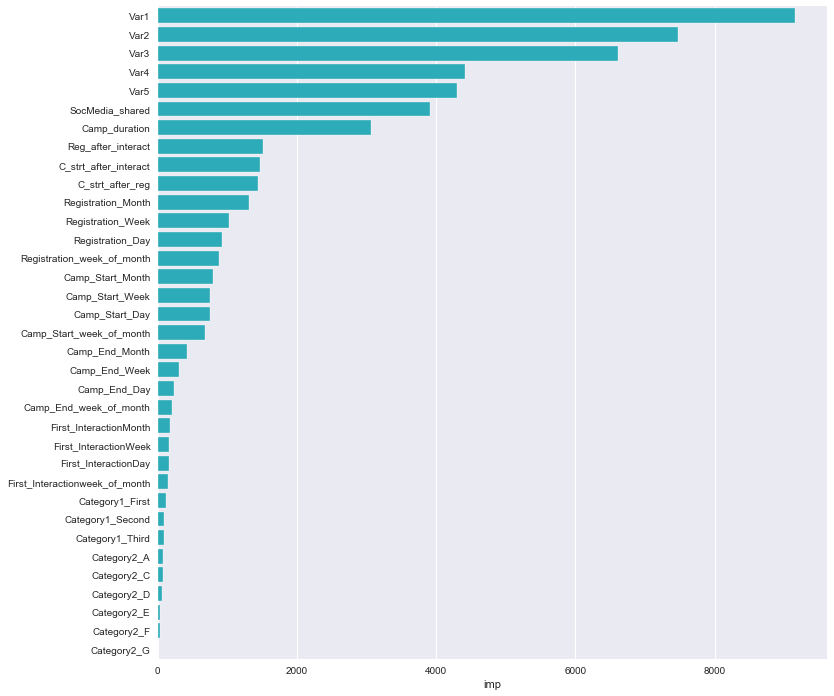

In [53]:
feature_imp=pd.DataFrame(model.feature_importances_,X_train.columns, columns=['imp'])
plt.figure(figsize=(12,12))
sns.barplot(x="imp",y=feature_imp.index,data=feature_imp.sort_values('imp',ascending=False), color=color[9])
plt.show()

In [54]:
pred=model.predict_proba(X_tst)[:,1]
sub['Outcome'] = pred
sub.to_csv('submission.csv', index=False)

In [ ]:
#from sklearn.model_selection import RandomizedSearchCV
#
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
#colsample_bytree = [x.round(2) for x in np.linspace(.1, 1, num = 10)]
#max_bin = [int(x) for x in np.linspace(10, 300, num = 10)]
#min_child_samples = [int(x) for x in np.linspace(10, 100, num = 10)]
#max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
#min_child_weight=[int(x) for x in np.linspace(0, 10, num = 11)]
#min_data_in_leaf=[int(x) for x in np.linspace(10, 100, num = 10)]
#min_split_gain=[int(x) for x in np.linspace(0, 10, num = 10)]
#sub_feature=[x.round(2) for x in np.linspace(.1, 1, num = 10)]
#subsample=[x.round(2) for x in np.linspace(.1, 1, num = 10)]
#bagging_fraction=[x.round(2) for x in np.linspace(.1, 1, num = 10)]
#reg_alpha = [x.round(3) for x in np.linspace(.01, .2, num = 10)]
#learning_rate=[x.round(3) for x in np.linspace(.01, .3, num = 10)]
#bagging_freq=[int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
#min_data=[int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
#num_leaves=[int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
#
#random_grid = {}
#random_grid['max_bin'] = max_bin
#random_grid['colsample_bytree'] = colsample_bytree
#random_grid['max_depth'] = max_depth
#random_grid['min_child_samples'] = min_child_samples
#random_grid['min_child_weight'] = min_child_weight
#random_grid['min_data_in_leaf'] = min_data_in_leaf
#random_grid['learning_rate'] = learning_rate # shrinkage_rate
#random_grid['boosting_type'] = ['gbdt']
#random_grid['objective'] = ['binary']
#random_grid['metric'] = ['auc']         # or 'mae'
#random_grid['sub_feature'] = sub_feature      # feature_fraction 
#random_grid['subsample'] = subsample
#random_grid['bagging_fraction'] = bagging_fraction # sub_row
#random_grid['bagging_freq'] = bagging_freq
#random_grid['num_leaves'] = num_leaves        # num_leaf
#random_grid['min_data'] = min_data         # min_data_in_leaf
#random_grid['reg_alpha'] = reg_alpha     # min_sum_hessian_in_leaf
#random_grid['verbose'] = [0,2]
#random_grid['seed'] = [7,41,147]
#
#print(random_grid)

In [ ]:
#lgbclassifier = lgb.LGBMClassifier(eval_metric='auc',booster='gbtree',objective='binary')
## Random search of parameters, using 3 fold cross validation, 
#lgb_random = RandomizedSearchCV(estimator = lgbclassifier, param_distributions = random_grid, n_iter = 10, cv = 5, random_state=41, n_jobs = -1)
## Fit the random search model
#lgb_random.fit(X_train, y_train)

In [ ]:
#lgb_random.best_estimator_

In [ ]:
#print("AUC on training set:",AUC(y_train, lgb_random.best_estimator_.predict(X_train)))
#print("AUC on validation set:",AUC(y_valid, lgb_random.best_estimator_.predict(X_valid)))

In [ ]:
#pred=lgb_random.best_estimator_.predict_proba(X_tst)[:,1]
#sub['Outcome'] = pred
#sub.to_csv('submission.csv', index=False)

In [56]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(
    random_seed=41,
    iterations=100, 
    learning_rate=0.02,depth=15,subsample= 0.7,
    eval_metric='AUC',
    custom_loss=['AUC'],
    loss_function='CrossEntropy'
)

clf.fit(X_train, y_train, 
        #cat_features=cat_features, 
        eval_set=(X_valid, y_valid),
        plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8224358	best: 0.8224358 (0)	total: 614ms	remaining: 1m
1:	test: 0.8362531	best: 0.8362531 (1)	total: 4.64s	remaining: 3m 47s
2:	test: 0.8421363	best: 0.8421363 (2)	total: 8.48s	remaining: 4m 34s
3:	test: 0.8439761	best: 0.8439761 (3)	total: 12.2s	remaining: 4m 52s
4:	test: 0.8453673	best: 0.8453673 (4)	total: 15.9s	remaining: 5m 1s
5:	test: 0.8453354	best: 0.8453673 (4)	total: 19.7s	remaining: 5m 8s
6:	test: 0.8463141	best: 0.8463141 (6)	total: 23.4s	remaining: 5m 11s
7:	test: 0.8465797	best: 0.8465797 (7)	total: 27.2s	remaining: 5m 13s
8:	test: 0.8474478	best: 0.8474478 (8)	total: 31.3s	remaining: 5m 16s
9:	test: 0.8481977	best: 0.8481977 (9)	total: 35.1s	remaining: 5m 15s
10:	test: 0.8485594	best: 0.8485594 (10)	total: 39.2s	remaining: 5m 17s
11:	test: 0.8485201	best: 0.8485594 (10)	total: 43.3s	remaining: 5m 17s
12:	test: 0.8485399	best: 0.8485594 (10)	total: 43.5s	remaining: 4m 51s
13:	test: 0.8487274	best: 0.8487274 (13)	total: 47.7s	remaining: 4m 52s
14:	test: 0.848735

In [57]:
clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'AUC',
 'iterations': 100,
 'sampling_frequency': 'PerTree',
 'leaf_estimation_method': 'Newton',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'model_size_reg': 0.5,
 'subsample': 0.699999988079071,
 'use_best_model': True,
 'random_seed': 41,
 'depth': 15,
 'border_count': 254,
 'classes_count': 0,
 'auto_class_weights': 'None',
 'sparse_features_conflict_fraction': 0,
 'custom_metric': ['AUC'],
 'leaf_estimation_backtracking': 'AnyImprovement',
 'best_model_min_trees': 1,
 'model_shrink_rate': 0,
 'min_data_in_leaf': 1,
 'loss_function': 'CrossEntropy',
 'learning_rate': 0.019999999552965164,
 'score_function': 'Cosine',
 'task_type': 'CPU',
 'leaf_estimation_iterations': 10,
 'bootstrap_type': 'MVS',
 'ma

In [58]:
print("AUC on training set:",AUC(y_train, clf.predict(X_train)))
print("AUC on validation set:",AUC(y_valid, clf.predict(X_valid)))

AUC on training set: 0.7641904369512201
AUC on validation set: 0.7475083083814474


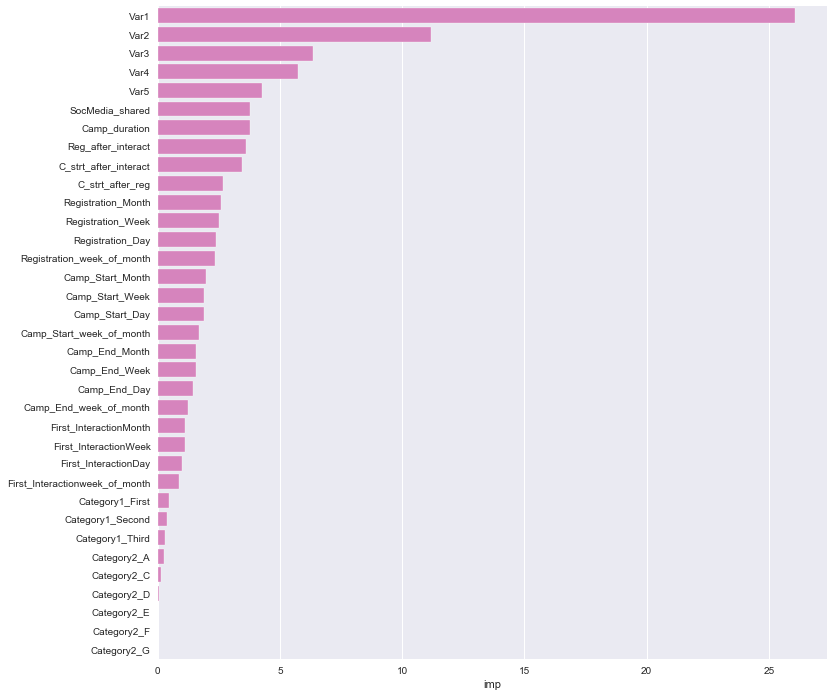

In [59]:
feature_imp=pd.DataFrame(clf.feature_importances_,X_train.columns, columns=['imp'])
plt.figure(figsize=(12,12))
sns.barplot(x="imp",y=feature_imp.index,data=feature_imp.sort_values('imp',ascending=False), color=color[6])
plt.show()

In [60]:
pred=clf.predict_proba(X_tst)[:,1]
sub['Outcome'] = pred
sub.to_csv('submission.csv', index=False)